### K- Means Clustering

- K-means algorithm
	- divide the data into groups.
	- we will get the centroid for the each group.
	- Process
		- initialize some (k) centroids.
		- find the distance to all the points nearest the centriods and mark them as that class.
		- distance cal => euclidian, manhatten
		- Move the centroids.
		- Move based on finding the average of all the points of same group.
		- Repeat the process.
	- k value is the hyper parameter.
	

### How to select the K - value..?
- WCSS - within clusters sum of squares
- intialize the k-value from k=> 1-20
- wcss = ∑i=1ton(distance between points to nearest centroid)^2
- calculate the wcss for all the k-values and plot the graph
- elbow method
- find the abrupt decrease in wcss then that is the k-value.
- Euclidian distance
	- ((x1-x2)^2+(y1-y2)^2)^0.5
- Manhattan distance
	- plot the projection on all the axis.
		- |x2-x1|+|y2-y1|


### Random initialization Trap
- k-means++ -- Solution
- what if random initialization goes wrong..?
- what if 2 centroids near to each other..?
- 

In [1]:
### K-means implementation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs


In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 1.86323460e+00, -5.86643084e+00],
       [-1.63182070e-01,  8.00866614e+00],
       [-6.54132100e-03,  6.60741698e+00],
       ...,
       [ 8.25970849e-01, -4.82093238e+00],
       [ 2.46570681e+00, -5.78995289e+00],
       [ 7.05896439e+00,  4.95108967e+00]])

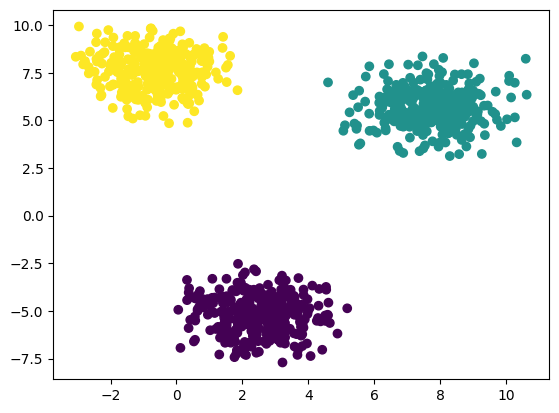

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
### Standardization --feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.cluster import KMeans  


In [12]:
### Elbow Method
wcss = []
for k in range(1,11):
	kmeans = KMeans(n_clusters=k,init='k-means++')
	kmeans.fit(X_train_scaled)
	wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.000000000001,
 713.1966367575085,
 73.52722137529246,
 62.271570803719825,
 51.1471005083246,
 38.04028249802377,
 35.154478766301025,
 41.27254623274675,
 29.586140502823998,
 26.605250186306048]

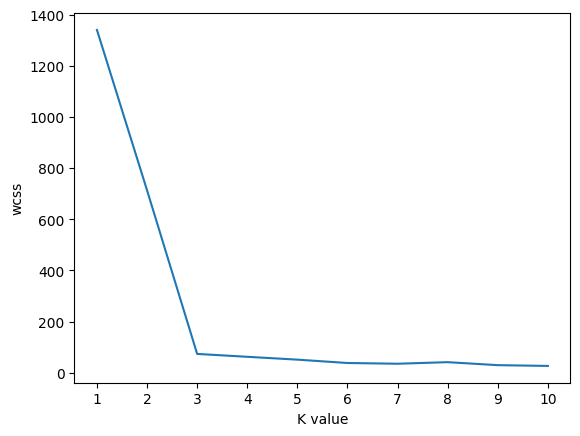

In [15]:
### plt elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('K value')
plt.ylabel('wcss')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1,
       1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1,
       0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2,

In [18]:
y_pred = kmeans.predict(X_test_scaled)

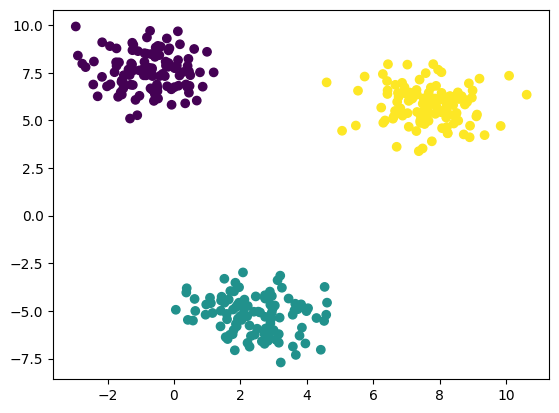

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

### validating the k value
- kneelocator
- silhoutee scoring


In [20]:
## Knee locator
!pip install kneed



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from kneed import KneeLocator
kl =KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [24]:
kl.elbow

np.int64(3)

In [25]:
## silhoutee score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coeffient = []
for k in range(2,11):
	kmeans = KMeans(n_clusters = k,init = "k-means++")
	kmeans.fit(X_train_scaled)
	score = silhouette_score(X_train_scaled,kmeans.labels_)
	silhouette_coeffient.append(score)

In [29]:
silhouette_coeffient

[np.float64(0.5459092453692286),
 np.float64(0.819367250135883),
 np.float64(0.6808467903915296),
 np.float64(0.5278676731199374),
 np.float64(0.49408713500454193),
 np.float64(0.48969078850276376),
 np.float64(0.36312002507002655),
 np.float64(0.3242086912939042),
 np.float64(0.33343103593279044)]

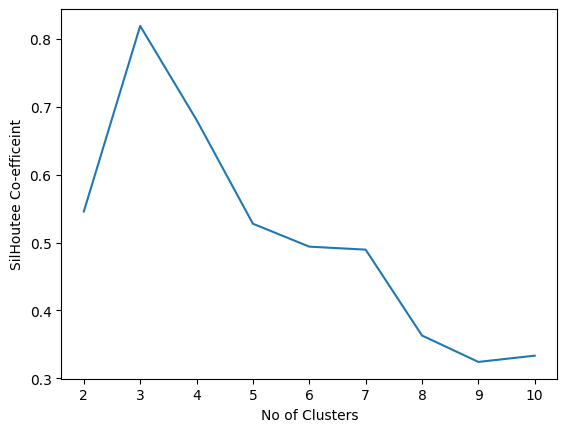

In [30]:
plt.plot(range(2,11),silhouette_coeffient)
plt.xticks(range(2,11))
plt.xlabel("No of Clusters")
plt.ylabel("SilHoutee Co-efficeint")
plt.show()
